In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Random Regression using Sckit Learn

In [2]:
X, Y = make_regression(n_samples=500, n_features=1, noise=6.5)
print(X.shape)
print(Y.shape)

(500, 1)
(500,)


In [3]:
print(X[:5,:])

[[ 0.18938453]
 [-0.64997118]
 [ 1.15499822]
 [ 0.48171717]
 [-0.77450339]]


In [4]:
print(Y[:5])

[ 20.54198331 -56.01850641 105.71960491  46.59401835 -99.06816709]


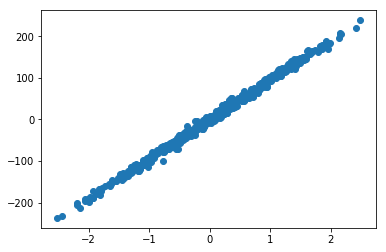

In [5]:
plt.scatter(X,Y)
plt.show()

In [6]:
split= int(0.8*X.shape[0]) # 0.8*500 = 400
print(split)

400


In [7]:
# Get Test and Train data, 80% for train and rest 20% for test
X_train = X[:split]
X_test = X[split:]
Y_train= Y[:split]
Y_test= Y[split:]

# Gradient Descent Algorithm
To minmise the error or parameter for low cost function we perform Gradient Descent algo
    1. Start with a random theta
    2. Repeat until converge
        i. Update Theta according to the rule       

In [40]:
# Helper functions

# linear Regrassion equation
def hypothesis (x, theta):
    ''' hypothesis line equation function for yh predicted and theta is m and c "yh=mx+c" '''
    return (theta[0] + theta[1]*x)

# Loss or Cost L2 (MSE or LSE) function () for optimizing our weights (m,c or theta[0], theta[1])
def loss_function(X,Y,theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        yh= hypothesis(X[i],theta)
        error += (yh-Y[i])**2
    mean_sq_error = error/m
    return mean_sq_error

#Gradient of linear equation means partial derivative wrt theta[1] i.e "m" and theta[1] i.e "c"
# https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
def gradient(X,Y,theta):
    m= X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        yh= hypothesis(X[i], theta)
        grad[0] += 2*(yh - Y[i])
        grad[1] += 2*(yh- Y[i])*X[i]
    grad[0] = grad[0]/m
    grad[1] = grad[1]/m
    return grad

#To minimize MSE we use Gradient Descent to calculate the gradient of our cost function.
def gradient_descent(X,Y,max_itr=30,lr=0.1):
    theta = np.array([0.0,0.0]) # random theta
    itr=0
    mse_list = []
    theta_list = []
    while itr <= max_itr:
        grad= gradient(X,Y,theta)
        mse = loss_function(X,Y,theta)
        mse_list.append(mse)
        theta_list.append((theta[0], theta[1]))
        theta[0] = theta[0] - grad[0]*lr
        theta[1] = theta[1] - grad[1]*lr
        itr += 1
    return theta, mse_list

In [41]:
final_theta, mse_list = gradient_descent(X_train,Y_train)

In [42]:
final_theta

array([ 0.27416958, 94.6799055 ])

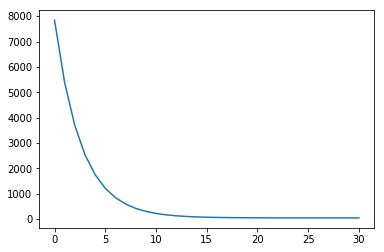

In [43]:
plt.plot(mse_list)
plt.show()

In [44]:
np.min(mse_list)

43.328116967346695

In [45]:
np.max(mse_list)

7838.947067333464

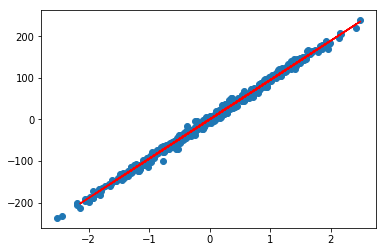

In [54]:
plt.scatter(X,Y)
Yp= hypothesis(X_test, final_theta)
plt.plot(X_test,Yp,color='red')
#plt.plot(X_test,Y_test, color='orange')
plt.show()

In [55]:
Yp[1]

array([229.31533899])

In [58]:
print(X_test[3])
print(Y_test[3])

[0.21086697]
24.87968820660331


In [59]:
yp= hypothesis(X_test[3],final_theta)
print(yp)

[20.23903444]
